
# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size

print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

When finished, you can close the environment.

In [7]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from collections import deque, namedtuple
import random
import pandas as pd
import matplotlib.pyplot as plt
from model import actor, critic
from Agent import *

In [17]:
def interact(env, agent, num_episodes):
    
    scores = []
    scores_window = deque(maxlen = 10)
    solved = False
    for episode in range(1, num_episodes):
        
        env_info = env.reset(train_mode= True)[brain_name]
        state = env_info.vector_observations
        score = 0
        # Monitor Process
        if (episode % 20) == 0:
            print(f"   currently processing {episode} episodes")
        while True:
            action = agent.act(state).detach().cpu().numpy()
            env_info = env.step(action)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            score += rewards[0]
            agent.collect(state, action, rewards, next_states, dones)
            state = next_states
            if np.any(dones):
                break
        scores_window.append(score)
        scores.append(score)
        print('\rEpisode {} Average Score: {:.2f}'.format(episode, np.mean(scores_window)), end="")
        if np.mean(scores_window) >= 30 and not solved:
            solved = True
            print(f'    this problem is solved at {episode} !')
    return scores

In [18]:
agent_s = agent(state_size, action_size, 11, 1e-4, 1e-3)

In [19]:
scores = interact(env, agent_s, 400)

Episode 19 Average Score: 0.58   currently processing 20 episodes
Episode 39 Average Score: 2.60   currently processing 40 episodes
Episode 59 Average Score: 5.13   currently processing 60 episodes
Episode 79 Average Score: 6.47   currently processing 80 episodes
Episode 99 Average Score: 5.30   currently processing 100 episodes
Episode 119 Average Score: 11.61   currently processing 120 episodes
Episode 139 Average Score: 14.76   currently processing 140 episodes
Episode 159 Average Score: 19.85   currently processing 160 episodes
Episode 179 Average Score: 26.42   currently processing 180 episodes
Episode 199 Average Score: 25.19   currently processing 200 episodes
Episode 205 Average Score: 30.35    this problem is solved at 205 !
Episode 219 Average Score: 24.35   currently processing 220 episodes
Episode 239 Average Score: 25.87   currently processing 240 episodes
Episode 259 Average Score: 35.15   currently processing 260 episodes
Episode 279 Average Score: 36.50   currently proc

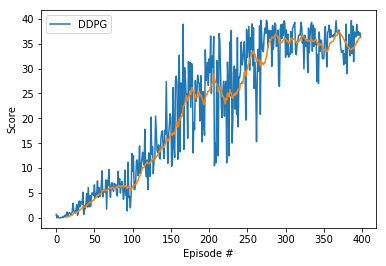

In [23]:
plt.plot(np.arange(len(scores)), scores, label = "DDPG")
plt.plot(pd.Series(scores).rolling(15).mean())
plt.ylabel("Score")
plt.xlabel("Episode #")
plt.legend(loc = 2)
plt.show();

In [ ]:
torch.save(agent.actor.state_dict(), "ddpg_actor.pt")
torch.save(agent.critic.state_dict(), "ddpg_critic.pt")